# **Unsupervised Learning**



*   **Unlabelled Data**








1.   **Clustering**

  * **K Means**
  * **Hierarchical Clustering**

2.   **Dimensionality Reduction**





# **K-Means	Algorithm**
 Step 1: Select K (no.of clusters)

Step 2: Choose K number of random centroids

Step 3: Find variance of each data point from the cluster centers(Subtraction)

Step 4: Assign each data point to closest **centroid**

Step 5: Calculate new centroid using mean of the data points in
each cluster (**centrioid updation**)

Step 6: Repeat steps 3 through 5 until the centroid no longer gets
updated (**similar mean,silimilar cluster**)

# **Example 1**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.cluster import KMeans

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Camerin DSML/Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
df.isna().sum()

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


In [ ]:
df.shape

(167, 10)

In [ ]:
df.dtypes

,0
country,object
child_mort,float64
exports,float64
health,float64
imports,float64
income,int64
inflation,float64
life_expec,float64
total_fer,float64
gdpp,int64


In [ ]:
df=df.drop(columns='country')
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
#selecting K value
#Elbow method
sse=[] #sum of squared Error
for i in range(1,len(df)):
  km=KMeans(n_clusters=i)
  km.fit(df[['child_mort',
                'exports',
                 'health',
                'imports',
                 'income',
              'inflation',
             'life_expec',
              'total_fer',
                 'gdpp']])
  sse.append(km.inertia_) #error in each iteration

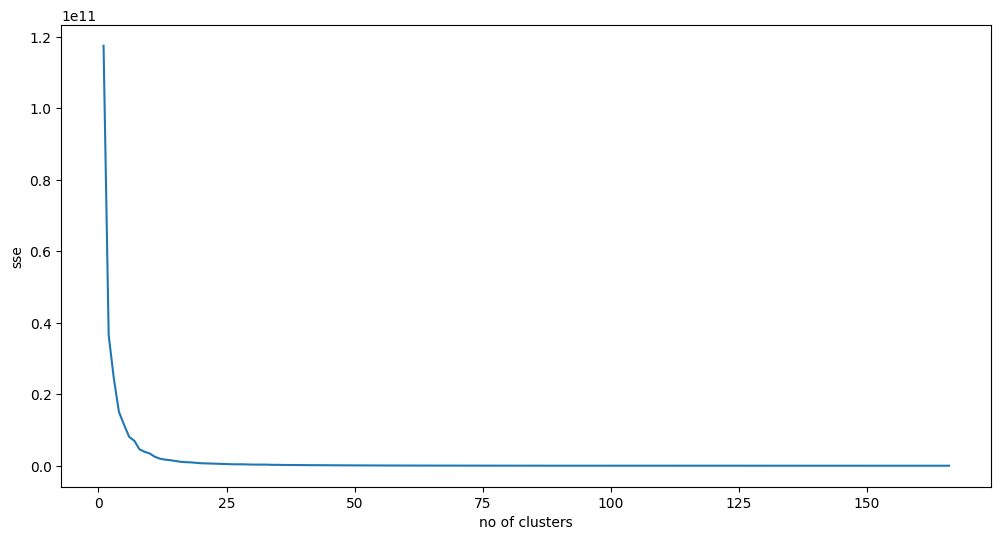

In [ ]:
#Elbow Graph
plt.figure(figsize=(12,6))
plt.xlabel('no of clusters')
plt.ylabel('sse')
plt.plot(range(1,len(df)),sse) #no of clusters vs sse
plt.show()

In [ ]:
#k=10
km=KMeans(n_clusters=10) #0-9 clusters
pred=km.fit_predict(df[['child_mort',
                'exports',
                 'health',
                'imports',
                 'income',
              'inflation',
             'life_expec',
              'total_fer',
                 'gdpp']])

In [ ]:
pred

array([9, 1, 1, 1, 6, 4, 1, 0, 0, 4, 7, 7, 9, 4, 4, 0, 1, 9, 1, 9, 1, 4,
       4, 2, 4, 9, 9, 9, 9, 0, 1, 9, 9, 6, 1, 1, 9, 9, 9, 4, 9, 6, 7, 7,
       0, 1, 1, 1, 1, 7, 9, 6, 1, 0, 0, 4, 9, 1, 0, 9, 7, 1, 1, 9, 9, 1,
       9, 6, 0, 9, 1, 4, 1, 0, 7, 0, 1, 0, 1, 4, 9, 9, 2, 9, 9, 4, 4, 9,
       9, 6, 6, 3, 1, 9, 9, 6, 1, 9, 7, 9, 4, 9, 9, 1, 4, 1, 9, 9, 1, 9,
       0, 7, 9, 9, 8, 7, 9, 4, 1, 1, 9, 6, 7, 5, 4, 6, 9, 9, 7, 9, 1, 6,
       9, 2, 6, 7, 9, 1, 7, 7, 1, 1, 9, 4, 0, 8, 9, 9, 1, 9, 9, 9, 1, 4,
       1, 9, 1, 2, 0, 0, 4, 9, 9, 4, 9, 9, 9], dtype=int32)

In [ ]:
df['cluster']=pred
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,9
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,6


In [ ]:
km.cluster_centers_ #centroid values

# **Example 2**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Camerin DSML/1669101081549_income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [ ]:
df.isna().sum()

,0
Name,0
Age,0
Income($),0


In [ ]:
df.shape

(22, 3)

In [ ]:
df.dtypes

,0
Name,object
Age,int64
Income($),int64


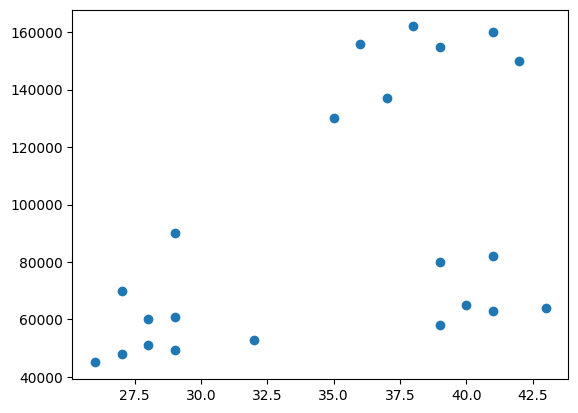

In [ ]:
plt.scatter(df['Age'],df['Income($)'])
plt.show()

In [ ]:
sse=[]
for i in range(1,len(df)):
  km=KMeans(n_clusters=i)
  km.fit(df[['Age','Income($)']])
  sse.append(km.inertia_)

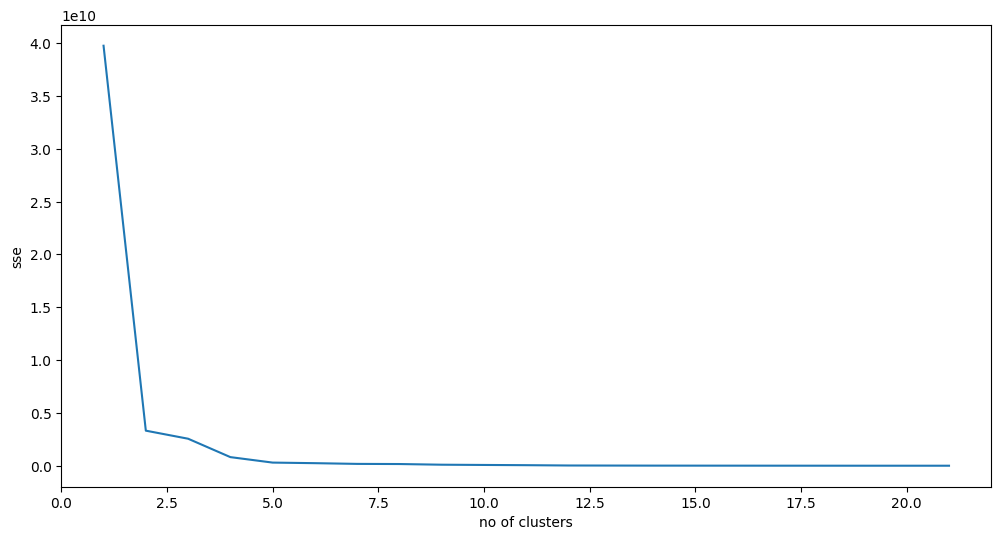

In [ ]:
plt.figure(figsize=(12,6))
plt.xlabel('no of clusters')
plt.ylabel('sse')
plt.plot(range(1,len(df)),sse) #no of clusters vs sse
plt.show()

In [ ]:
km=KMeans(n_clusters=3) #clusters=0,1,2
pred=km.fit_predict(df[['Age','Income($)']])

In [ ]:
pred

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [ ]:
df['cluster']=pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [ ]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

In [ ]:
df1=df[df['cluster']==0]
df2=df[df['cluster']==1]
df3=df[df['cluster']==2]

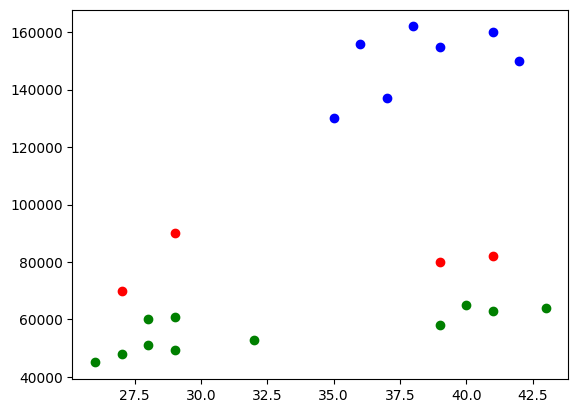

In [ ]:
plt.scatter(df1['Age'],df1['Income($)'],color='red')
plt.scatter(df2['Age'],df2['Income($)'],color='blue')
plt.scatter(df3['Age'],df3['Income($)'],color='green')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()
df['Income($)']=scaler.fit_transform(df[['Income($)']])
df['Age']=scaler.fit_transform(df[['Age']])

In [ ]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [ ]:
km=KMeans(n_clusters=3)
pred=km.fit_predict(df[['Age','Income($)']])
pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [ ]:
df['cluster']=pred
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [ ]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [ ]:
df1=df[df['cluster']==0]
df2=df[df['cluster']==1]
df3=df[df['cluster']==2]

[[0.72268908 0.8974359 ]
 [0.1372549  0.11633428]
 [0.85294118 0.2022792 ]]


X cordinates:
[0.72268908 0.1372549  0.85294118]

Y cordinates:
[0.8974359  0.11633428 0.2022792 ]



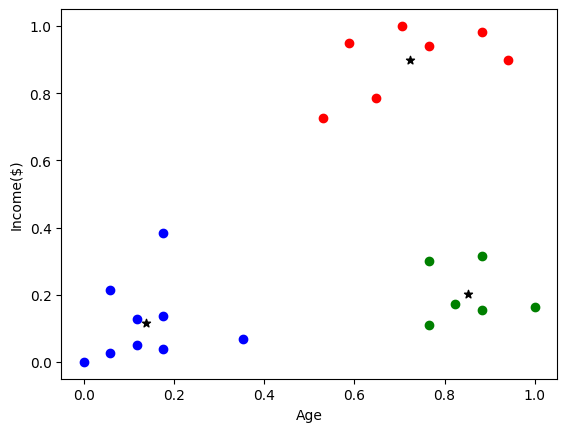

In [ ]:
plt.scatter(df1['Age'],df1['Income($)'],color='red')
plt.scatter(df2['Age'],df2['Income($)'],color='blue')
plt.scatter(df3['Age'],df3['Income($)'],color='green')
plt.xlabel('Age')
plt.ylabel('Income($)')
centers=km.cluster_centers_
print(centers) #returns cordinate values
print('\n')
print(f'X cordinates:\n{centers[:,0]}') #x cordinates
print(f'\nY cordinates:\n{centers[:,1]}\n') #y cordinates
plt.scatter(centers[:,0],centers[:,1],marker='*',color='black') #ploting centroid
plt.show()

# **Example 3**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from  sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Camerin DSML/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df=df.drop(columns=['CustomerID','Genre','Spending Score (1-100)'])
df.head()

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17


In [ ]:
df.isna().sum()

,0
Age,0
Annual Income (k$),0


In [ ]:
df.shape

(200, 2)

In [ ]:
df.dtypes

,0
Age,int64
Annual Income (k$),int64


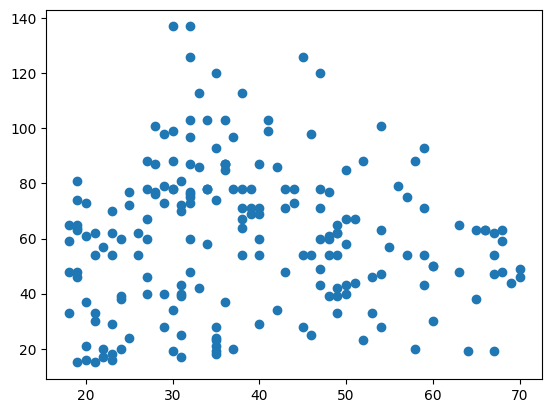

In [ ]:
plt.scatter(df['Age'],df['Annual Income (k$)'])
plt.show()

In [ ]:
scaler=MinMaxScaler()
df[['Age']]=scaler.fit_transform(df[['Age']])
df[['Annual Income (k$)']]=scaler.fit_transform(df[['Annual Income (k$)']])
df.head()

,Age,Annual Income (k$)
0,0.019231,0.000000
1,0.057692,0.000000
2,0.038462,0.008197
3,0.096154,0.008197
4,0.250000,0.016393


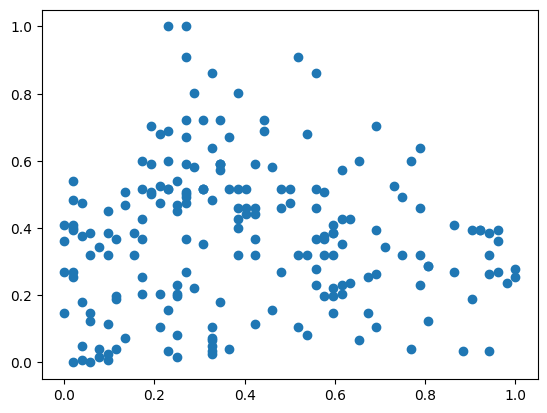

In [ ]:
plt.scatter(df['Age'],df['Annual Income (k$)'])
plt.show()

In [ ]:
sse=[]
for i in range(1,len(df)):
  km=KMeans(n_clusters=i)
  km.fit(df[['Age','Annual Income (k$)']])
  sse.append(km.inertia_)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (192) found smaller than n_clusters (193). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (192) found smaller than n_clusters (194). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (192) found smaller than n_clusters (195). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (192) found smaller than n_clusters (196). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/

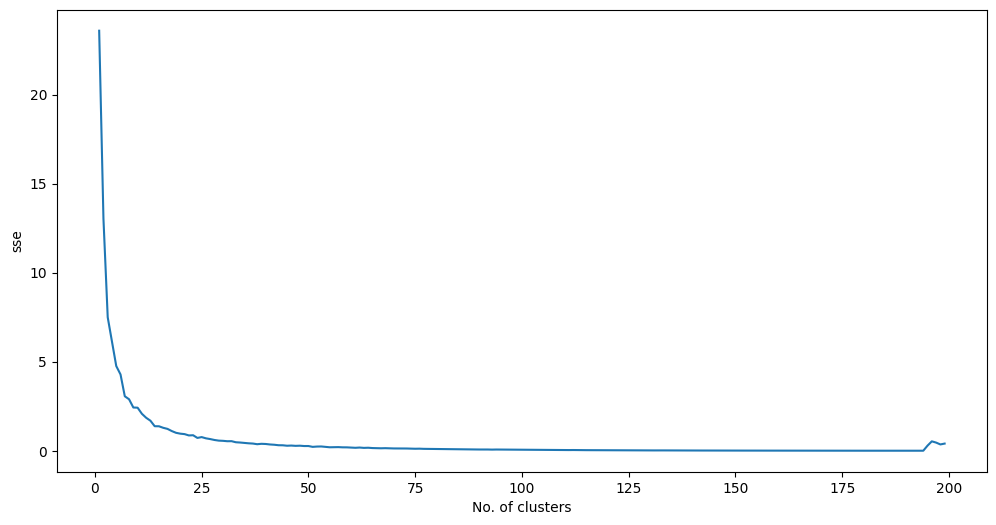

In [ ]:
plt.figure(figsize=(12,6))
plt.xlabel('No. of clusters')
plt.ylabel('sse')
plt.plot(range(1,len(df)),sse)
plt.show()

In [ ]:
km=KMeans(n_clusters=12)
pred=km.fit_predict(df[['Age','Annual Income (k$)']])
pred

array([ 6,  6,  6,  6,  3,  6,  3,  6,  4,  3,  4,  3,  8,  6,  3,  6,  3,
        6,  8,  3,  3,  6,  8,  3,  8, 10,  8,  3,  3,  6,  4,  6,  8,  6,
        8,  6,  8, 10, 10,  6,  4,  6,  8, 10,  8,  6,  8, 10, 10, 10,  8,
       10, 10,  4,  8,  8,  8,  4, 10,  8,  4,  1,  4,  8, 11,  1,  0,  4,
        1, 10,  4,  0, 11, 11, 11,  1,  0,  5,  1,  0, 11,  5, 11,  0,  1,
        0,  0,  1,  5,  0, 11,  1,  0,  5,  7,  1,  0,  1,  0,  1,  1,  0,
       11,  1,  0,  1, 11,  0, 11, 11, 11,  1,  5,  1,  1,  1, 11,  0,  0,
        0,  1,  5,  5,  5,  1,  7,  5,  5, 11,  5,  0,  5,  1,  7,  1,  7,
        5,  7,  1,  7,  9,  7,  7,  7,  7,  7,  0,  7,  7,  7,  5,  5,  5,
        5,  5,  7,  5,  7,  7,  7,  9,  7,  1,  7,  9,  7,  5,  7,  7,  7,
        5,  7,  7,  7,  9,  7,  9,  7,  9,  7,  2,  2,  9,  2,  2,  2,  9,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2], dtype=int32)

In [ ]:
km.cluster_centers_

array([[0.58805668, 0.37014668],
       [0.06650641, 0.38285519],
       [0.32905983, 0.78551913],
       [0.31643357, 0.05812221],
       [0.92115385, 0.19098361],
       [0.42399267, 0.45979703],
       [0.07239819, 0.08003857],
       [0.25961538, 0.52814208],
       [0.61538462, 0.16972035],
       [0.69230769, 0.60143443],
       [0.24125874, 0.20268256],
       [0.87362637, 0.35655738]])

In [ ]:
df['cluster']=pred
df.head()

,Age,Annual Income (k$),cluster
0,0.019231,0.000000,6
1,0.057692,0.000000,6
2,0.038462,0.008197,6
3,0.096154,0.008197,6
4,0.250000,0.016393,3


In [ ]:
df1=df[df['cluster']==0]
df2=df[df['cluster']==1]
df3=df[df['cluster']==2]
df4=df[df['cluster']==3]
df5=df[df['cluster']==4]
df6=df[df['cluster']==5]
df7=df[df['cluster']==6]
df8=df[df['cluster']==7]
df9=df[df['cluster']==8]
df10=df[df['cluster']==9]
df11=df[df['cluster']==10]
df12=df[df['cluster']==11]

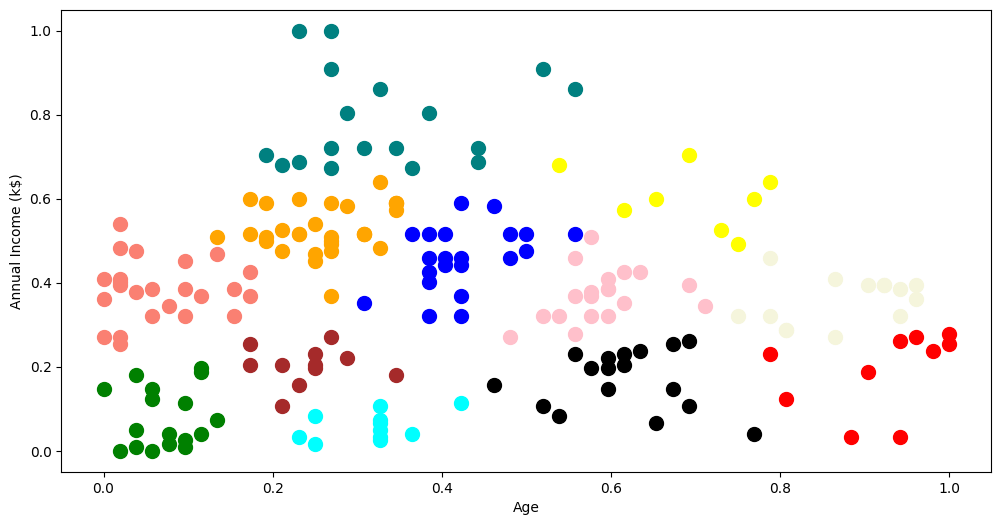

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(df1['Age'],df1['Annual Income (k$)'],s=100,c='pink')
plt.scatter(df2['Age'],df2['Annual Income (k$)'],s=100,c='salmon')
plt.scatter(df3['Age'],df3['Annual Income (k$)'],s=100,c='teal')
plt.scatter(df4['Age'],df4['Annual Income (k$)'],s=100,c='cyan')
plt.scatter(df5['Age'],df5['Annual Income (k$)'],s=100,c='red')
plt.scatter(df6['Age'],df6['Annual Income (k$)'],s=100,c='blue')
plt.scatter(df7['Age'],df7['Annual Income (k$)'],s=100,c='green')
plt.scatter(df8['Age'],df8['Annual Income (k$)'],s=100,c='orange')
plt.scatter(df9['Age'],df9['Annual Income (k$)'],s=100,c='black')
plt.scatter(df10['Age'],df10['Annual Income (k$)'],s=100,c='yellow')
plt.scatter(df11['Age'],df11['Annual Income (k$)'],s=100,c='brown')
plt.scatter(df12['Age'],df12['Annual Income (k$)'],s=100,c='beige')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()


# **Example 4**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Camerin DSML/wine-clustering.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df.isna().sum()

,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


In [ ]:
df.shape

(178, 13)

In [ ]:
df.dtypes

,0
Alcohol,float64
Malic_Acid,float64
Ash,float64
Ash_Alcanity,float64
Magnesium,int64
Total_Phenols,float64
Flavanoids,float64
Nonflavanoid_Phenols,float64
Proanthocyanins,float64
Color_Intensity,float64


In [ ]:
scaler=preprocessing.MinMaxScaler()
for i in df:
  df[i]=scaler.fit_transform(df[[i]])

In [ ]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [ ]:
sse=[]
for i in range(1,len(df)):
  km=KMeans(n_clusters=i)
  km.fit(df[['Alcohol','Malic_Acid','Ash','Ash_Alcanity','Magnesium','Total_Phenols','Flavanoids',
             'Nonflavanoid_Phenols','Proanthocyanins','Color_Intensity','Hue','OD280','Proline']])
  sse.append(km.inertia_)

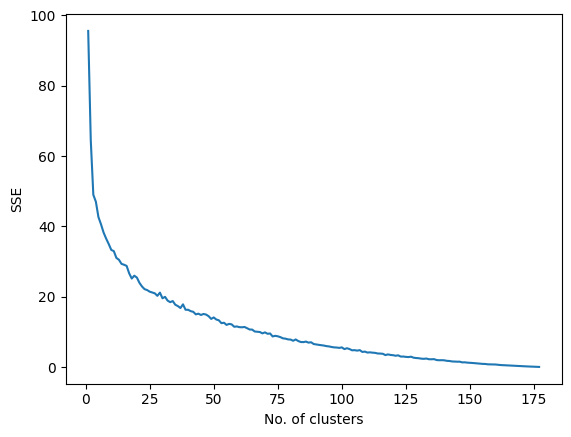

In [ ]:
plt.xlabel("No. of clusters")
plt.ylabel('SSE')
plt.plot(range(1,len(df)),sse)
plt.show()

In [ ]:
km=KMeans(n_clusters=40)
pred=km.fit_predict(df[['Alcohol','Malic_Acid','Ash','Ash_Alcanity','Magnesium','Total_Phenols','Flavanoids',
             'Nonflavanoid_Phenols','Proanthocyanins','Color_Intensity','Hue','OD280','Proline']])
pred

array([18,  1, 19,  7,  6,  7, 11, 27, 11, 22, 11, 11, 11,  7,  7,  7, 19,
       19,  7, 38, 18, 38, 27, 27, 27,  6, 27,  1,  6, 27, 19,  7, 19, 31,
       27, 27,  6,  1,  1,  4, 18, 38, 22, 38, 18, 38, 22, 22, 19,  7, 22,
       11,  7,  7, 22, 19, 18,  7,  7, 20, 30, 30,  1, 25, 14,  3, 25, 26,
       30, 15, 33, 25, 10, 28, 25, 13,  8, 13, 15, 29,  8,  1, 14, 21, 39,
        8, 14, 14, 16, 26, 33, 33, 33, 10, 25, 15, 24,  8, 25, 29,  8, 26,
       12, 10, 26, 33, 26, 33, 26, 39, 36, 10, 16,  3, 12, 14, 26, 26,  5,
       26, 12, 23,  0, 36, 36, 12, 12, 16, 12,  0, 24, 24, 24, 24, 17, 17,
       32, 21, 21, 21, 21, 32, 21, 32, 32, 32, 32,  2,  9, 37, 37, 37, 35,
        2, 17,  2,  2, 21, 34, 34,  9, 21, 21, 32,  9,  2, 37,  9,  9, 37,
        5,  9,  9,  2,  9, 37,  9,  2], dtype=int32)

In [ ]:
km.cluster_centers_

In [ ]:
df['cluster']=pred
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,18
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,1
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,19
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,7
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,6


# **Example 5**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Camerin DSML/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.isna().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


In [ ]:
df.shape

(50, 5)

In [ ]:
df.dtypes

,0
R&D Spend,float64
Administration,float64
Marketing Spend,float64
State,object
Profit,float64


In [ ]:
df=df.drop(columns=['State','Profit'])

In [ ]:
df.dtypes

,0
R&D Spend,float64
Administration,float64
Marketing Spend,float64


In [ ]:
Scaler=preprocessing.MinMaxScaler()
for i in df:
  df[i]=Scaler.fit_transform(df[[i]])
df.head()

,R&D Spend,Administration,Marketing Spend
0,1.000000,0.651744,1.000000
1,0.983359,0.761972,0.940893
2,0.927985,0.379579,0.864664
3,0.873136,0.512998,0.812235
4,0.859438,0.305328,0.776136


In [ ]:
sse=[]
for i in range(1,len(df)):
  km=KMeans(n_clusters=i)
  km.fit(df[['R&D Spend','Administration','Marketing Spend']])
  sse.append(km.inertia_)

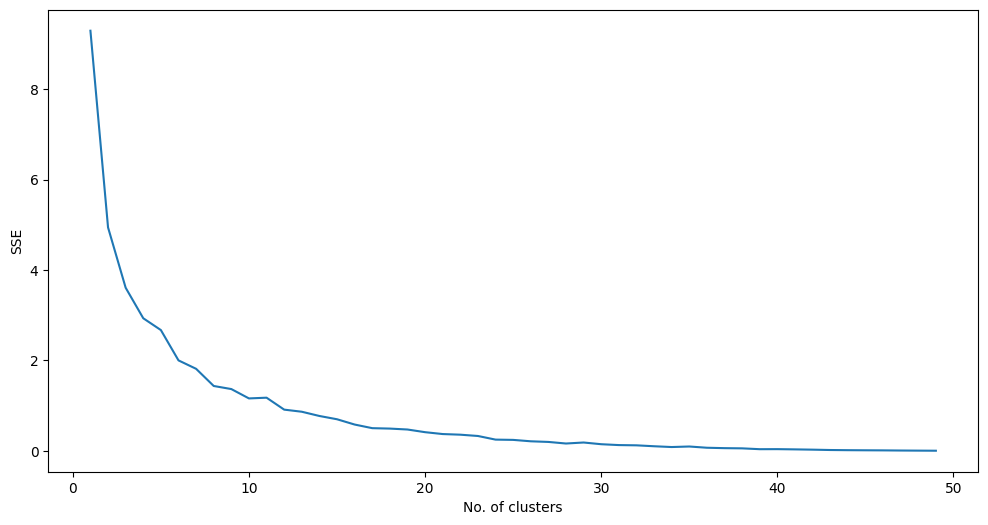

In [ ]:
plt.figure(figsize=(12,6))
plt.xlabel('No. of clusters')
plt.ylabel('SSE')
plt.plot(range(1,len(df)),sse)
plt.show()

In [ ]:
km=KMeans(n_clusters=11)
pred=km.fit_predict((df[['R&D Spend','Administration','Marketing Spend']]))
pred

array([ 7,  7,  2,  2,  2,  2,  0,  9,  9,  2,  6,  6,  6,  6,  9,  6,  6,
        9,  6,  4,  6,  9,  6,  6,  8,  4,  4,  6,  4,  4,  8,  4,  8,  5,
        1,  5,  1,  5,  5,  5,  1,  5,  5,  3,  3,  3,  1,  3, 10,  3],
      dtype=int32)